# Hate Speech And Offensive Language Detection

#### Nowadays we are well aware of the fact that if social media platforms are not handled carefully then they can create chaos in the world.One of the problems faced on these platforms are usage of Hate Speech and Offensive Language.Usage of such Language often results in fights, crimes or sometimes riots at worst.So, Detection of such language is essential and as humans cannot monitor such large volumes of data, we can take help of AI and detect the use of such language and prevent users from using such languages.

## Importing the Dataset

In [1]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/twitter.zip"
!unzip -qo twitter.zip 
!rm twitter.zip

--2020-11-10 04:33:49--  https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/twitter.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.62.40
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.62.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1055041 (1.0M) [application/x-zip-compressed]
Saving to: ‘twitter.zip’

twitter.zip         100%[===================>]   1.01M  --.-KB/s    in 0.02s   

2020-11-10 04:33:50 (49.6 MB/s) - ‘twitter.zip’ saved [1055041/1055041]



## Importing Libraries

In [1]:
# Essential tools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#NLP tools
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.metrics import confusion_matrix, accuracy_score

import os


[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     arya.ashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Visualization and Preprocessing

In [2]:
tweets_df = pd.read_csv('labeled_data.csv')
tweets_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
tweets_df = tweets_df.drop(['neither','Unnamed: 0','count','hate_speech','offensive_language'], axis= 1)

In [4]:
tweets_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


#### Adding length column to data to see length of tweets

In [5]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [6]:
tweets_df.head()

,class,tweet,length
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [7]:
tweets_df.describe()

,class,length
count,24783.000000,24783.000000
mean,1.110277,85.436065
std,0.462089,41.548238
min,0.000000,5.000000
25%,1.000000,52.000000
50%,1.000000,81.000000
75%,1.000000,119.000000
max,2.000000,754.000000


## Segregating data on the basis of class

In [8]:
hatespeech = tweets_df[tweets_df['class']==0]

In [9]:
hatespeech

,class,tweet,length
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",61
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",83
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",119
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",117
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...",72
...,...,...,...
24576,0,this guy is the biggest faggot omfg,35
24685,0,which one of these names is more offensive kik...,106
24751,0,you a pussy ass nigga and I know it nigga.,42
24776,0,you're all niggers,18


In [10]:
offensive = tweets_df[tweets_df['class']==1]

In [11]:
offensive

,class,tweet,length
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",158
...,...,...,...
24774,1,you really care bout dis bitch. my dick all in...,58
24775,1,"you worried bout other bitches, you need me for?",48
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,146
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,67


In [12]:
neutral = tweets_df[tweets_df['class']==2]

In [13]:
neutral

,class,tweet,length
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
40,2,""" momma said no pussy cats inside my doghouse """,47
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",87
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",66
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",69
...,...,...,...
24736,2,yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...,75
24737,2,yea so about @N_tel 's new friend.. all my fri...,115
24767,2,"you know what they say, the early bird gets th...",95
24779,2,"you've gone and broke the wrong heart baby, an...",70


## Visualizing each class

In [14]:
sentences = hatespeech['tweet'].tolist()
len(sentences)

1430

In [15]:
sentences_as_one_string = " ".join(sentences)

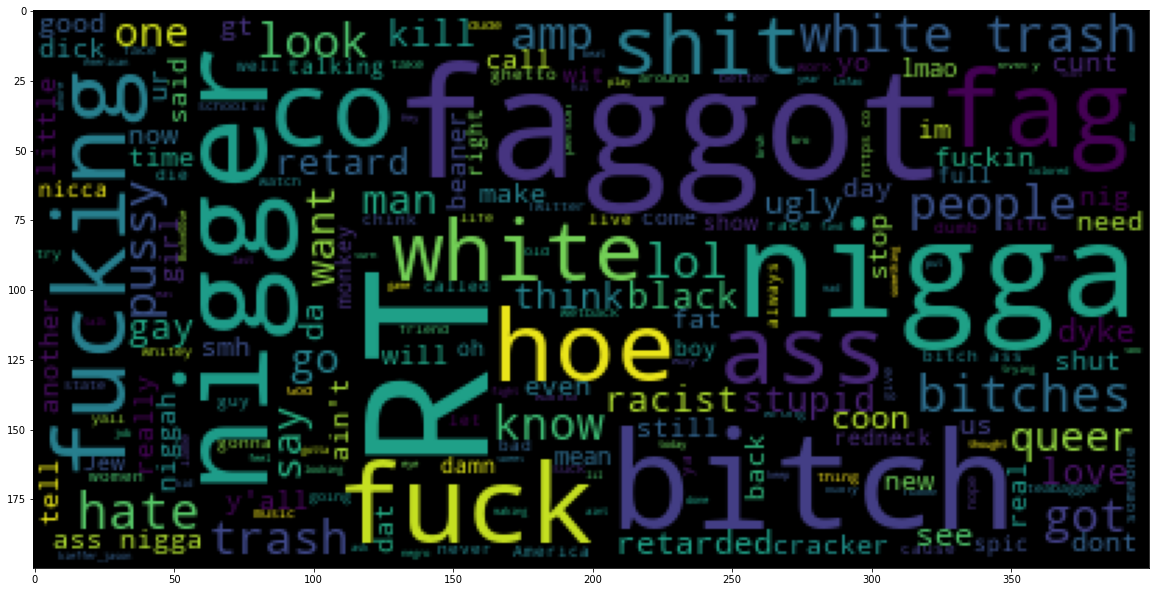

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [17]:
sentences = offensive['tweet'].tolist()
len(sentences)

19190

In [18]:
sentences_as_one_string = " ".join(sentences)

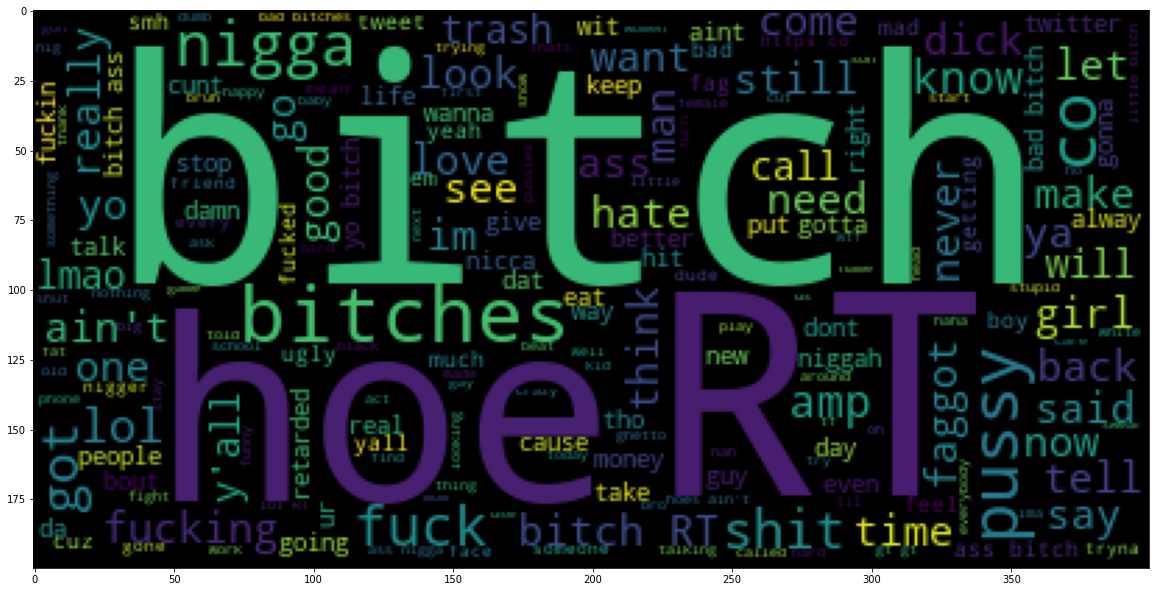

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [20]:
sentences = neutral['tweet'].tolist()
len(sentences)

4163

In [21]:
sentences_as_one_string = " ".join(sentences)

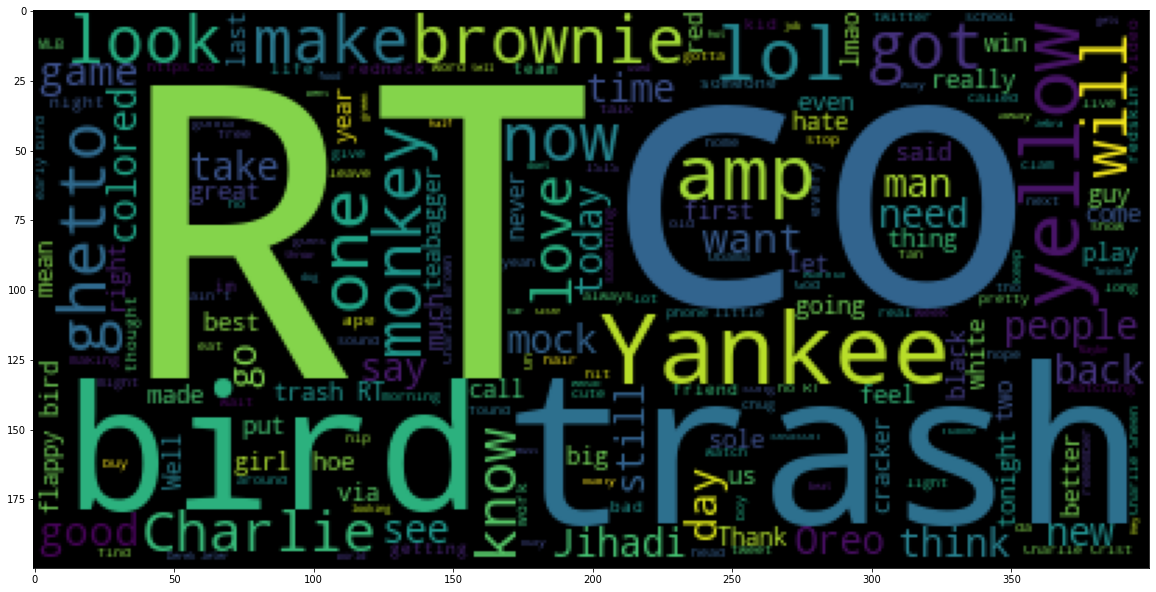

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

## Preprocessing the tweets

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_clean_join = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean_join

In [26]:
# Create a new Dataframe for cleaned text
tweets_df_clean = pd.DataFrame(columns=['class', 'tweet'])
tweets_df_clean['tweet'] = tweets_df['tweet'].apply(message_cleaning)
tweets_df_clean['class'] = tweets_df['class']

In [27]:
tweets_df_clean.head()

,class,tweet
0,2,RT mayasolovely woman shouldnt complain cleani...
1,1,RT mleew17 boy dats coldtyga dwn bad cuffin da...
2,1,RT UrKindOfBrand Dawg RT 80sbaby4life ever fuc...
3,1,RT CGAnderson vivabased look like tranny
4,1,RT ShenikaRoberts shit hear might true might f...


In [28]:
print(tweets_df_clean['tweet'][5]) # show the cleaned up version
print(tweets_df['tweet'][5]) # show the original version

TMadisonx shit blows meclaim faithful somebody still fucking hoes 128514128514128514
!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"


## Vectorizing the cleaned text for model training

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df_clean['tweet']).toarray()

In [30]:
tweets_countvectorizer.shape

(24783, 63)

In [31]:
X = tweets_countvectorizer
X

array([[11,  0,  0, ...,  0,  3,  0],
       [11,  0,  2, ...,  0,  2,  0],
       [11,  1,  0, ...,  0,  2,  0],
       ...,
       [ 9,  0,  0, ...,  0,  1,  0],
       [ 5,  0,  0, ...,  0,  1,  0],
       [13,  1,  0, ...,  0,  1,  0]], dtype=uint8)

In [32]:
y = tweets_df_clean['class']
y = pd.get_dummies(y)
y = np.array(y)
y

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [33]:
X.shape

(24783, 63)

In [34]:
y.shape

(24783, 3)

## Test-Train Split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [36]:
X_train.shape

(22304, 63)

In [37]:
total_words = 200
total_words

200

## Model architecture

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [39]:
# Sequential Model
model1 = Sequential()

# embeddidng layer
model1.add(Embedding(total_words, output_dim = 32))
model1.add(LSTM(32))
model1.add(RepeatVector(200))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))

model1.add(Dense(3,activation= 'softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          6400      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 200, 32)           0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 5

## Model Training

In [40]:
# train the model
history = model1.fit(X_train, y_train, batch_size = 256, validation_split = 0.1, epochs = 50)

Epoch 1/50
79/79 [==============================] - 5s 62ms/step - loss: 0.7643 - acc: 0.7671 - val_loss: 0.6753 - val_acc: 0.7692
Epoch 2/50
79/79 [==============================] - 4s 56ms/step - loss: 0.6606 - acc: 0.7747 - val_loss: 0.6749 - val_acc: 0.7692
Epoch 3/50
79/79 [==============================] - 4s 56ms/step - loss: 0.6604 - acc: 0.7747 - val_loss: 0.6750 - val_acc: 0.7692
Epoch 4/50
79/79 [==============================] - 4s 55ms/step - loss: 0.6578 - acc: 0.7747 - val_loss: 0.6750 - val_acc: 0.7692
Epoch 5/50
79/79 [==============================] - 4s 54ms/step - loss: 0.6511 - acc: 0.7747 - val_loss: 0.6706 - val_acc: 0.7692
Epoch 6/50
79/79 [==============================] - 4s 55ms/step - loss: 0.6484 - acc: 0.7747 - val_loss: 0.6676 - val_acc: 0.7692
Epoch 7/50
79/79 [==============================] - 4s 56ms/step - loss: 0.6469 - acc: 0.7747 - val_loss: 0.6668 - val_acc: 0.7692
Epoch 8/50
79/79 [==============================] - 4s 56ms/step - loss: 0.6466 - a

Model Accuracy can be improved and around 80% accuracy acn be achieved by letting the model train a little longer 

## Training Plots

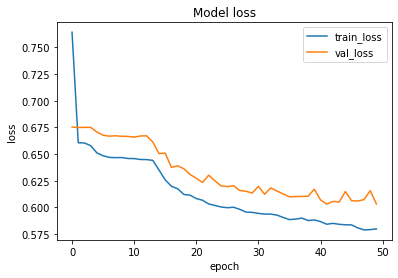

In [41]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

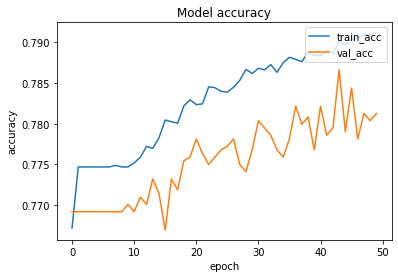

In [42]:
# plot the training artifacts

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

## Save the trained model

In [51]:
model1.save("HSD.h5")

## Accessing the Model's Performance

In [44]:
model1.evaluate(X_test,y_test)

78/78 [==============================] - 1s 8ms/step - loss: 0.5910 - acc: 0.7878


[0.5909664630889893, 0.787817656993866]

In [45]:
print(tweets_df['tweet'][0])
print(tweets_df['tweet'][1])
print(tweets_df['tweet'][2])
print(tweets_df['tweet'][3])
print(tweets_df['tweet'][4])

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [46]:
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet'][:5]).toarray()

In [47]:
preds = model1.predict(tweets_countvectorizer)

In [48]:
preds_class = []
for i in range(len(preds)):
    preds_class.append(np.argmax(preds[i]))
preds_class = np.array(preds_class) 

In [49]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = preds_class
df['Actual Labels'] = tweets_df['class'][:5]
df.head()

,Predicted Labels,Actual Labels
0,1,2
1,1,1
2,1,1
3,1,1
4,1,1


## Compiling the model with DeepC

In [50]:
!deepCC HSD.h5

reading [keras model] from 'HSD.h5'
Saved 'HSD.onnx'
reading onnx model from file  HSD.onnx
Model info:
  ir_vesion :  5 
  doc       : 
WARN (ONNX): lstm (LSTM) has 4 inputs, that aren't connected.
WARN (ONNX): terminal (input/output) embedding_input's shape is less than 1.
             changing it to 1.
WARN (ONNX): terminal (input/output) embedding_input's shape is less than 1.
             changing it to 1.
WARN (ONNX): terminal (input/output) dense_2's shape is less than 1.
             changing it to 1.
WARN (GRAPH): found operator node with the same name (dense_2) as io node.
ERROR (GRAPH): some of graph sequential's node lstm's
               outputs are not connected to other nodes in the graph.
running DNNC graph sanity check ... FAILED. Please check your model.
graph sequential
operator Cast {
	input embedding_input
	output casted
}
operator embedding {
	input embedding_embeddings_0
	input casted
	output embedding_embedding_lookup_Identity_1_0
}
operator Transpose1 {
	input 